In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import sweetviz as sv

In [41]:
df1 = pd.read_csv("supermarket_sales.csv")

In [43]:
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [45]:
df1.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [47]:
df1.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [53]:
df1['Date'] = pd.to_datetime(df1['Date'])

/var/folders/mp/yp30c1b1223453lxr5t14k_h0000gn/T/ipykernel_26993/1148610173.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [55]:
df1.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [57]:
df1.set_index('Date', inplace= True)

In [59]:
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [61]:
df1.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [29]:
# What does the distribution of customer ratings looks like?Is it skewed ?

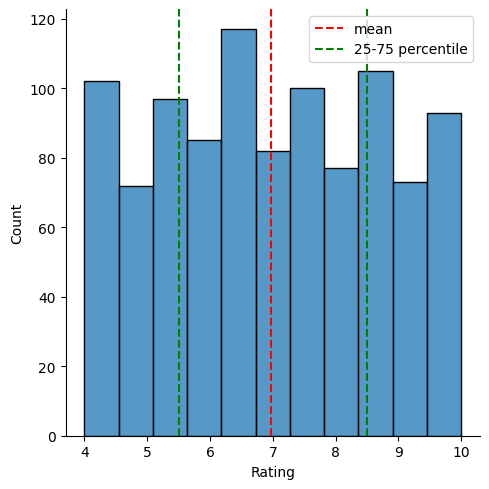

In [63]:
sns.displot(df1['Rating'])
plt.axvline(x=np.mean(df1['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df1['Rating'],25), c='green', ls='--', label='25-75 percentile')
plt.axvline(x=np.percentile(df1['Rating'],75), c='green', ls='--')
plt.legend()
# Rating looks like its distributed uniformly.
# There don't seem to be skew in any direction.

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

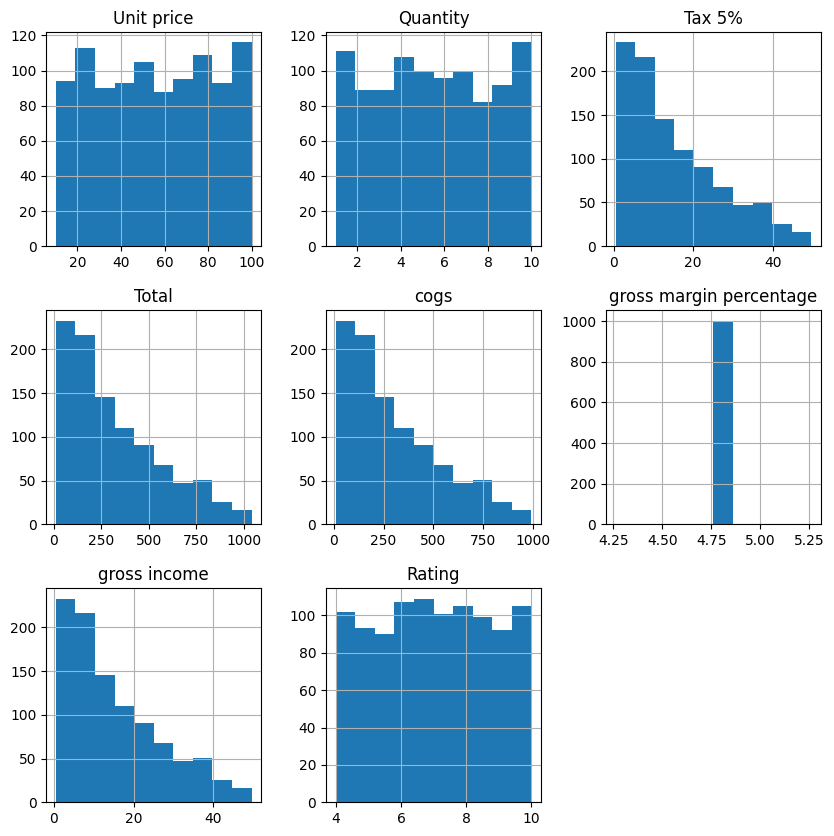

In [65]:
df1.hist(figsize =(10,10))

In [35]:
#2 Do aggregate sales numbers differ much by branches ?

<Axes: xlabel='count', ylabel='Branch'>

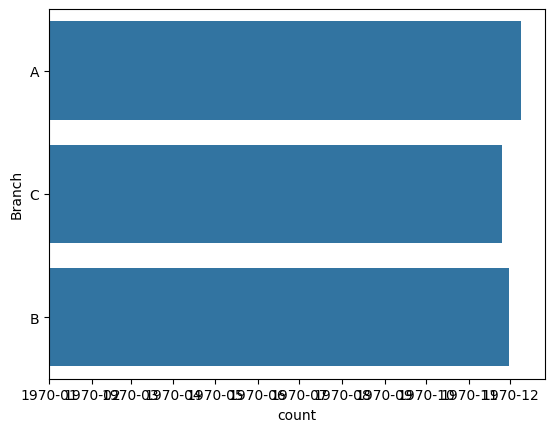

In [67]:
sns.countplot(df1['Branch'])

In [37]:
df1['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

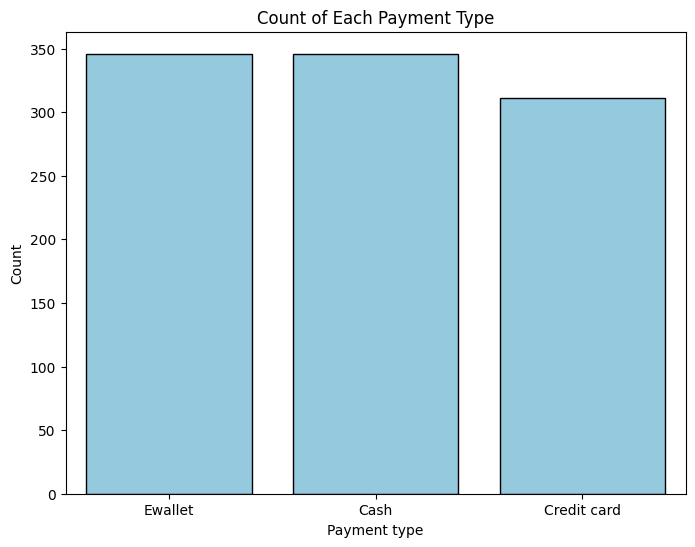

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Payment', color='skyblue', edgecolor='black')

# Set labels for the axes
plt.xlabel('Payment type')   # x-label as count
plt.ylabel('Count')  # y-label as payment type
plt.title('Count of Each Payment Type')

# Show the plot
plt.show()

In [ ]:
#Task 3: Bivariate Analysis

In [ ]:
# Checking if there is a relationship between gross income and customer 
# ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

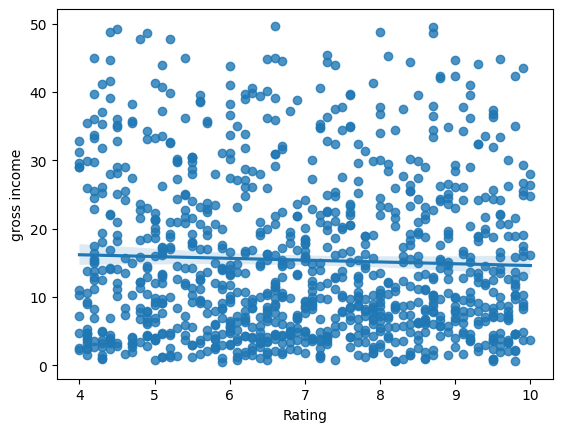

In [87]:
sns.regplot(x=df['Rating'], y=df['gross income'])

In [ ]:
# there doesn't seem to be any relationship

<Axes: xlabel='Branch', ylabel='gross income'>

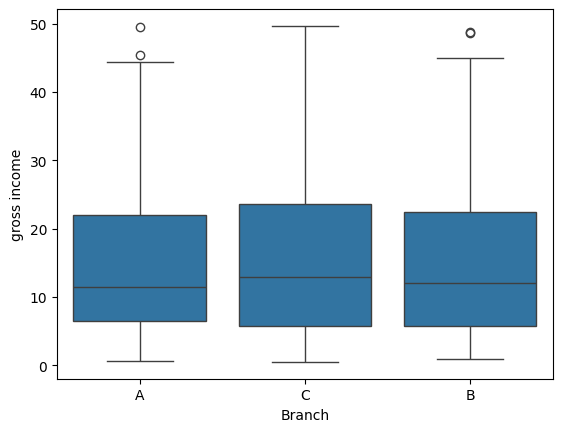

In [89]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

In [ ]:
# There doesn't seem to be much variable in branch income

<Axes: xlabel='Gender', ylabel='gross income'>

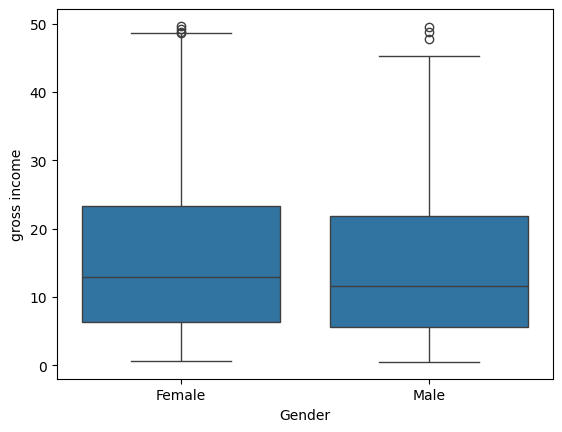

In [91]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

In [ ]:
# Is there a noticeable time trend in gross income ?

In [93]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/19,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3/8/19,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
3/3/19,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
1/27/19,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2/8/19,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [97]:
df.groupby(df.index).mean(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
1/1/19,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
1/10/19,58.051111,6.111111,18.841000,395.661000,376.820000,4.761905,18.841000,6.066667
1/11/19,59.962500,5.000000,12.589063,264.370313,251.781250,4.761905,12.589063,7.100000
1/12/19,56.900000,7.272727,22.444864,471.342136,448.897273,4.761905,22.444864,6.845455
1/13/19,53.150000,4.777778,11.672400,245.120400,233.448000,4.761905,11.672400,6.720000
...,...,...,...,...,...,...,...,...
3/5/19,58.235882,6.058824,17.453441,366.522265,349.068824,4.761905,17.453441,6.723529
3/6/19,51.197273,6.222222,13.387864,281.145136,267.757273,4.761905,13.387864,7.209091
3/7/19,47.862222,4.111111,7.609833,159.806500,152.196667,4.761905,7.609833,6.988889


In [105]:
df.groupby(df.index).mean(numeric_only=True).index

Index(['1/1/19', '1/10/19', '1/11/19', '1/12/19', '1/13/19', '1/14/19',
       '1/15/19', '1/16/19', '1/17/19', '1/18/19', '1/19/19', '1/2/19',
       '1/20/19', '1/21/19', '1/22/19', '1/23/19', '1/24/19', '1/25/19',
       '1/26/19', '1/27/19', '1/28/19', '1/29/19', '1/3/19', '1/30/19',
       '1/31/19', '1/4/19', '1/5/19', '1/6/19', '1/7/19', '1/8/19', '1/9/19',
       '2/1/19', '2/10/19', '2/11/19', '2/12/19', '2/13/19', '2/14/19',
       '2/15/19', '2/16/19', '2/17/19', '2/18/19', '2/19/19', '2/2/19',
       '2/20/19', '2/21/19', '2/22/19', '2/23/19', '2/24/19', '2/25/19',
       '2/26/19', '2/27/19', '2/28/19', '2/3/19', '2/4/19', '2/5/19', '2/6/19',
       '2/7/19', '2/8/19', '2/9/19', '3/1/19', '3/10/19', '3/11/19', '3/12/19',
       '3/13/19', '3/14/19', '3/15/19', '3/16/19', '3/17/19', '3/18/19',
       '3/19/19', '3/2/19', '3/20/19', '3/21/19', '3/22/19', '3/23/19',
       '3/24/19', '3/25/19', '3/26/19', '3/27/19', '3/28/19', '3/29/19',
       '3/3/19', '3/30/19', '3/4/19', 

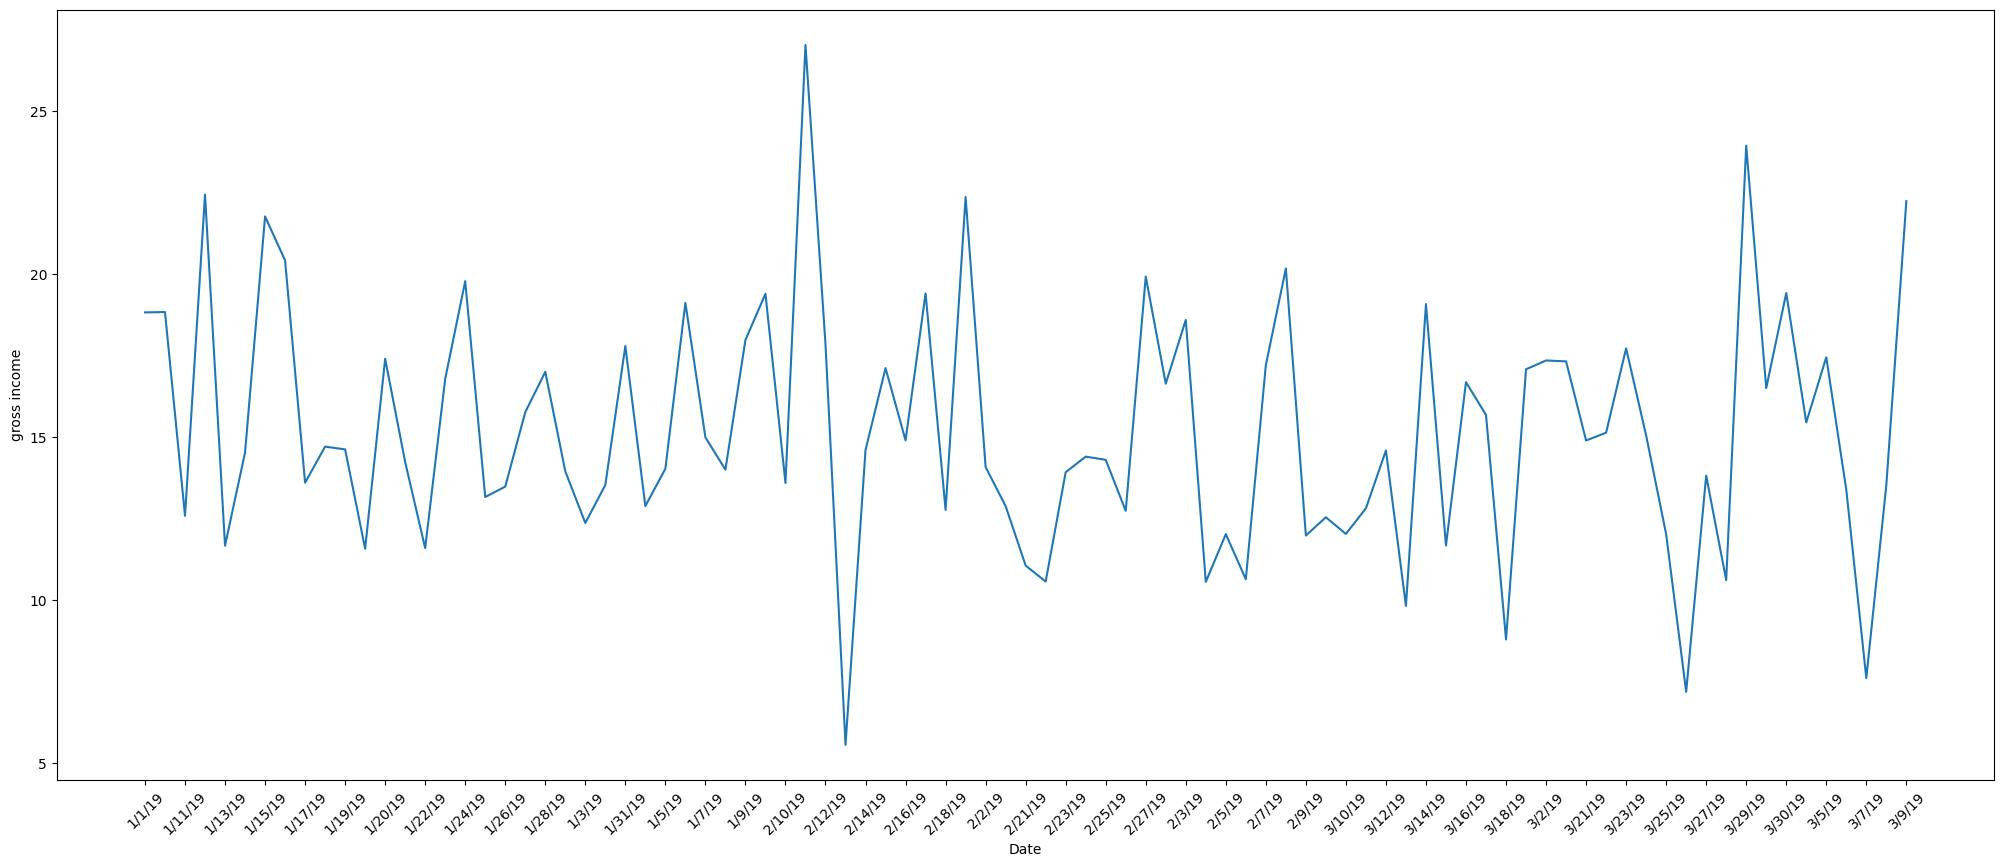

In [133]:
subset_dates = df.groupby(df.index).mean(numeric_only=True).index[::2]

plt.figure(figsize=(25,10)) 
sns.lineplot(x= df.groupby(df.index).mean(numeric_only=True).index, 
             y= df.groupby(df.index).mean(numeric_only=True)['gross income'])
plt.xticks(subset_dates, rotation=45)
plt.show()

In [ ]:
# There doesn't seem to be any trend 

In [ ]:
#---- Dealing with duplicate rows and missing values-----#

In [195]:
df1.duplicated().sum()

0

In [143]:
df1[df1.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [193]:
df1.drop_duplicates(inplace=True)

In [149]:
df1.isna().sum() # this is to check how many missing values are there

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [151]:
df1.isna().sum()/len(df1) # This helps in finding the ratio of missing values

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: ylabel='Date'>

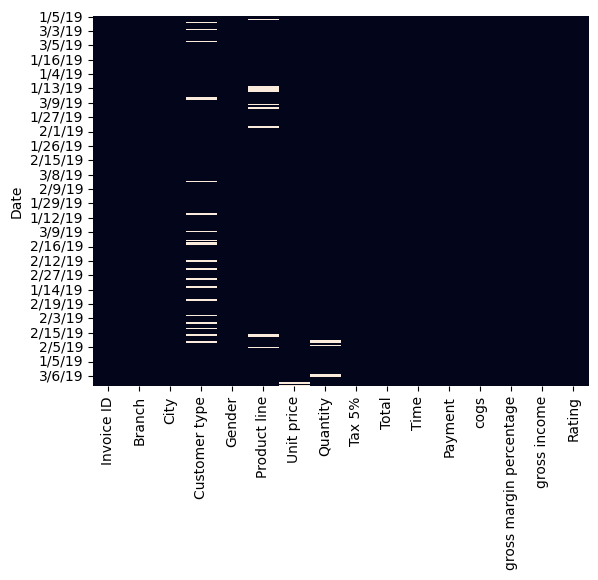

In [157]:
sns.heatmap(df.isnull(), cbar=False) # To visualize what the missing values are

In [167]:
# Replace missing values in 'customer' column with the mode (most frequent value)
df1['Customer type'].fillna(df1['Customer type'].mode()[0])

# Replace missing values in 'product type' column with the mode (most frequent value)
df1['Product line'].fillna(df1['Product line'].mode()[0])

Date
2019-01-05         Health and beauty
2019-03-08    Electronic accessories
2019-03-03        Home and lifestyle
2019-01-27         Health and beauty
2019-02-08         Sports and travel
                       ...          
2019-01-29         Health and beauty
2019-03-02        Home and lifestyle
2019-02-09        Food and beverages
2019-02-22        Home and lifestyle
2019-02-18       Fashion accessories
Name: Product line, Length: 1000, dtype: object

In [179]:
df1['Unit price'].fillna(df1['Unit price'].mean(), inplace=True)
df1['Quantity'].fillna(df1['Quantity'].mean(),inplace=True)

/var/folders/mp/yp30c1b1223453lxr5t14k_h0000gn/T/ipykernel_26993/1482503352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Unit price'].fillna(df1['Unit price'].mean(), inplace=True)
/var/folders/mp/yp30c1b1223453lxr5t14k_h0000gn/T/ipykernel_26993/1482503352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

<Axes: ylabel='Date'>

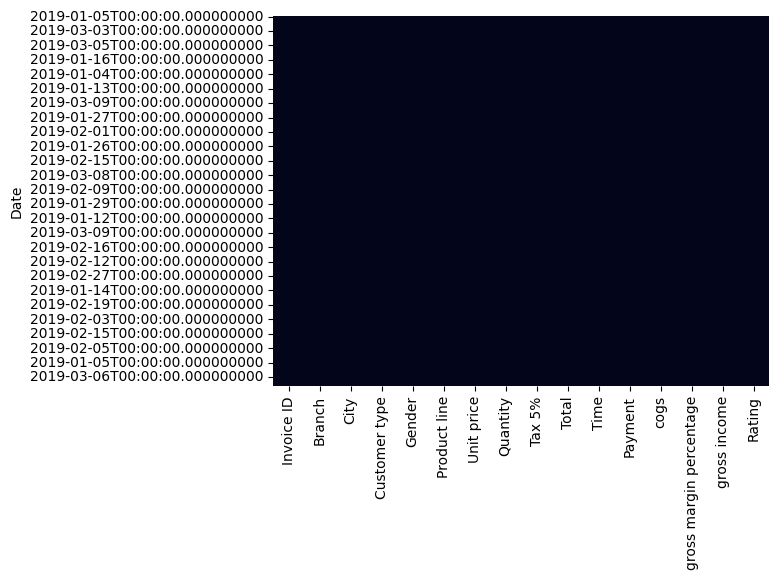

In [181]:
sns.heatmap(df1.isnull(), cbar=False) # To visualize what the missing values are

In [191]:
dset = pd.read_csv('supermarket_sales.csv')
report = sv.analyze(dset)
report.show_html('sweetviz_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Task 5: Correlation Analysis

In [199]:
df1['gross income'].corr(df1['Rating']) # finding relation between them
# but its very tiny.

-0.03644170499701838

In [215]:
np.round(df1.select_dtypes(include=['number']).corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.70,0.70,0.70,NaN,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.70,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


<Axes: >

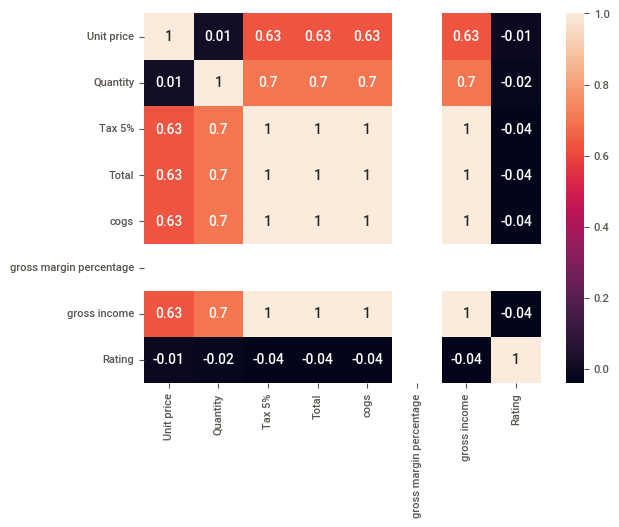

In [219]:
sns.heatmap(np.round(df1.select_dtypes(include=['number']).corr(),2)
           ,annot=True)

In [ ]:
#Rating doesn't seem to be correlated with any value. Which is 
#interesting to realize.